# Logistic Regression
In cases which demands probability calculations, we do not get to work with continous values but occurences, zeros and ones. In that case linear regression approach does not result in an accurate model. First of all we need to calculate a probability value as a result, and a probability is between 0 and 1. In the other hand, a linear model reaches values beyond that limit. So, we need to apply an **activation function** to limit the output in the desired range. For this case **sigmoid function** is used. <br>
Now we need to consider our function as a nesting of two functions. Where:
$$g(x)=Ax+B$$
$$h(x)=\frac{1}{1+e^{-x}}$$
$$y(x)=h(g(x))$$

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, model_selection
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

Let's define a sample probability distribution using the equations above. We can assume a case like **probability of being +13 compared to height of that person**.

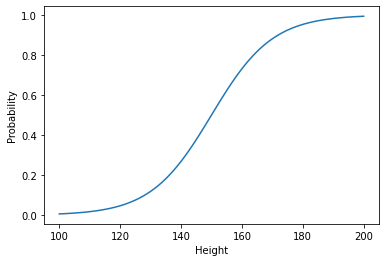

In [2]:
A = 0.1
B = -15

x_range = [100, 200]
X = np.linspace(x_range[0], x_range[1], 100)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def linear(x,A,B):
    return A*x+B

def probability(x,A,B):
    return sigmoid(linear(x,A,B))


Y = probability(X,A,B)

plt.plot(X,Y)
plt.xlabel('Height')
plt.ylabel('Probability')
plt.show()

Now, using the **model** probility distribution, we synthesize a sample dataset.

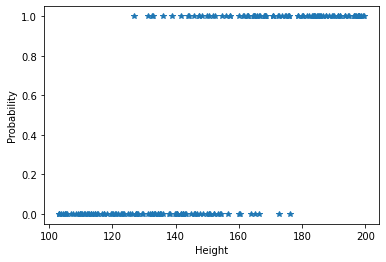

In [3]:
def load_dataset(n=200):
    x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
    p = probability(x,A,B)
    # Binomial function results in an 0-1 array which has the occurence probability indicated in p for each element.
    y = np.random.binomial(1, p)
    return np.array(y).reshape(-1,1), np.array(x).reshape(-1,1)

y, x = load_dataset()

plt.plot(x,y,'*')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.show()

For logistic regression, a custom loss function called **binary cross-entropy** is used. It can be simply be written as below.
$$L = -log(y_{pred}) when y_{true}=1$$
$$L = -log(1-y_{pred}) when y_{true}=0$$
Using these conditions, we can derive a more general equation.
$$L = -\frac{1}{N} \sum y_{true}log(y_{pred})+(1-y_{true})log(1-y_{pred})$$
In order to calculate the gradient for this loss function, we use the chain rule.
$$\frac{\partial L}{\partial A}= \frac{\partial L}{\partial h}\frac{\partial h}{\partial g}\frac{\partial g}{\partial A}$$
$$\frac{\partial L}{\partial B}= \frac{\partial L}{\partial h}\frac{\partial h}{\partial g}\frac{\partial g}{\partial B}$$
Fortunately, we do not need to code it, nor calculate it again and again, as optimized libraries already exist.

## <font color=red>**Optional Exercise**</font>
Derive the equations for $\frac{\partial L}{\partial A}$ and $\frac{\partial L}{\partial B}$

[0.01008172 0.01100558 0.01201307 0.01311157 0.01430906 0.01561419
 0.0170363  0.01858549 0.02027265 0.02210951 0.02410872 0.02628384
 0.02864944 0.03122112 0.03401557 0.03705056 0.04034504 0.0439191
 0.047794   0.05199219 0.05653725 0.06145388 0.06676781 0.07250573
 0.07869519 0.08536438 0.09254199 0.10025695 0.10853817 0.11741415
 0.12691264 0.13706021 0.14788173 0.15939982 0.17163434 0.18460167
 0.19831417 0.21277945 0.22799977 0.24397141 0.26068407 0.27812044
 0.29625573 0.31505745 0.33448527 0.35449107 0.37501917 0.39600675
 0.41738447 0.43907729 0.46100544 0.48308557 0.50523193 0.52735778
 0.54937669 0.57120388 0.59275753 0.61395999 0.63473878 0.65502757
 0.67476684 0.69390445 0.71239592 0.73020463 0.74730177 0.76366612
 0.77928373 0.79414749 0.80825656 0.82161582 0.83423519 0.84612903
 0.85731543 0.86781562 0.87765338 0.88685443 0.89544595 0.90345611
 0.91091364 0.91784749 0.92428652 0.93025921 0.93579348 0.94091646
 0.94565443 0.95003263 0.95407524 0.95780531 0.96124473 0.96441

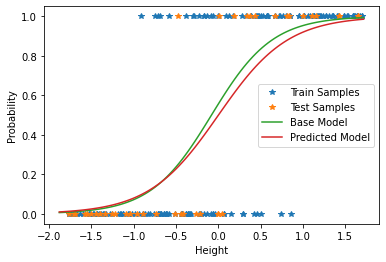

In [4]:
# First, we apply standardization, and split the data set as train and test.
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X.reshape(-1,1))

# We defined a regressor and then fitted our sample data. We could use two seperate lines: one for initializiation and
# for fitting. However, this approach is also correct.
regressor = linear_model.LogisticRegression().fit(X_train,y_train)

# If we used only predict method, we would get 1 for values over 0.5 and 0 for the below. We used proba to see
# probability distribution.
prediction = regressor.predict_proba(X.reshape(-1, 1))[:,1]
print(prediction)
plt.plot(X_train,y_train,'*', label='Train Samples')
plt.plot(X_test,y_test,'*', label='Test Samples')
plt.plot(X,Y, label='Base Model')
plt.plot(X,prediction, label='Predicted Model')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Probability')
plt.show()

In [5]:
print('Test Accuracy: ', regressor.score(X_test,y_test))
print(x)

Test Accuracy:  0.95
[[149.87417944]
 [150.55568906]
 [141.71230795]
 [173.60788865]
 [125.57361532]
 [154.66200333]
 [150.49045279]
 [168.12763249]
 [188.695211  ]
 [147.4091773 ]
 [119.40819716]
 [113.34157623]
 [162.83317885]
 [184.79888223]
 [145.96206857]
 [114.58415511]
 [152.20396668]
 [161.45478829]
 [152.08187417]
 [185.09636753]
 [140.3713921 ]
 [142.26667948]
 [129.27156711]
 [198.683746  ]
 [103.81371189]
 [127.59407766]
 [187.51046803]
 [110.46886429]
 [184.18023179]
 [174.88574808]
 [170.84010016]
 [152.35644273]
 [115.42135694]
 [199.42894119]
 [183.09812226]
 [104.83671069]
 [133.04778577]
 [123.05003082]
 [140.49729786]
 [178.64491033]
 [164.37682705]
 [168.47741534]
 [172.75536094]
 [121.06810261]
 [138.16743291]
 [180.46613995]
 [113.20553193]
 [112.03117121]
 [191.30907205]
 [155.92146556]
 [154.07036098]
 [121.77966465]
 [198.12998437]
 [187.70643931]
 [145.8972003 ]
 [160.19426896]
 [165.64197136]
 [132.62836007]
 [180.02170359]
 [198.09695549]
 [189.77735478]
 [1

## Predicting Heart Attack Probability

In this section, you are going to use the dataset given below, and predict the risk of heart attack. <br>
https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

In [6]:
import pandas as pd

PatientData = pd.read_csv('heart.csv')
#PatientData.head()
print(PatientData)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

### Step 1.1
Split data into y (target) and x (every other variable).

In [7]:
y = PatientData["target"]
x = {i:PatientData[i] for i in PatientData if i!="target"}
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


### Step 1.2
There are parameters with categorical data, which already are integers but not have ordinal characteristic, among the predictors. 
We have to One-Hot-Encode them.

In [8]:
# One hot encode part. cp, restecg, thal are the parameters. They are integers already, not strings.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
print(PatientData["cp"])
cp_list = np.array(list(PatientData["cp"])).reshape(-1,1)
cp_OHE = onehot_encoder.fit_transform(cp_list)
print(cp_OHE)
PatientData["cp"] = cp_OHE

onehot_encoder = OneHotEncoder(sparse=False)
print(PatientData["restecg"])
restecg_list = np.array(list(PatientData["restecg"])).reshape(-1,1)
restecg_OHE = onehot_encoder.fit_transform(restecg_list)
print(restecg_OHE)
PatientData["restecg"] = restecg_OHE

onehot_encoder = OneHotEncoder(sparse=False)
print(PatientData["thal"])
thal_list = np.array(list(PatientData["thal"])).reshape(-1,1)
thal_OHE = onehot_encoder.fit_transform(thal_list)
print(thal_OHE)
PatientData["thal"] = thal_OHE

#put the data into x again
x = {i:PatientData[i] for i in PatientData if i!="target"}

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: restecg, Length: 303, dtype: int64
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 

### Step 2
Inspect data (visualizing, extracting correlations etc.), explain if logistic regression is a good fit for this purpose.

In [9]:
feature_names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
table = pd.concat([pd.DataFrame(x, columns = feature_names), pd.Series(y, name = "TARGET")], axis = 1)
table.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,TARGET
0,63,1,0.0,145,233,1,1.0,150,0,2.3,0,0,0.0,1
1,37,1,0.0,130,250,0,0.0,187,0,3.5,0,0,0.0,1
2,41,0,0.0,130,204,0,1.0,172,0,1.4,2,0,0.0,1
3,56,1,0.0,120,236,0,0.0,178,0,0.8,2,0,0.0,1
4,57,0,1.0,120,354,0,0.0,163,1,0.6,2,0,0.0,1


In [10]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    float64
 13  TARGET    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [11]:
table.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,TARGET
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.471947,131.623762,246.264026,0.148515,0.485149,149.646865,0.326733,1.039604,1.399340,0.729373,0.006601,0.544554
std,9.082101,0.466011,0.500038,17.538143,51.830751,0.356198,0.500606,22.905161,0.469794,1.161075,0.616226,1.022606,0.081110,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,0.000000,130.000000,240.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,1.000000,200.000000,564.000000,1.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,1.000000


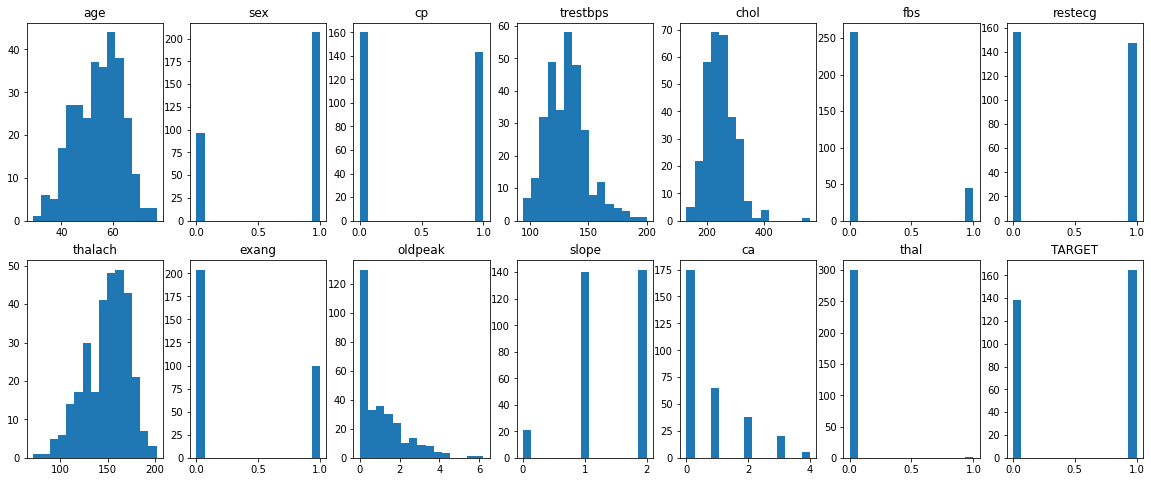

In [12]:
plt.figure(figsize=(20,8))

for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.hist(table.iloc[:, i], bins=15)
    plt.title(table.columns[i])
    
plt.show()

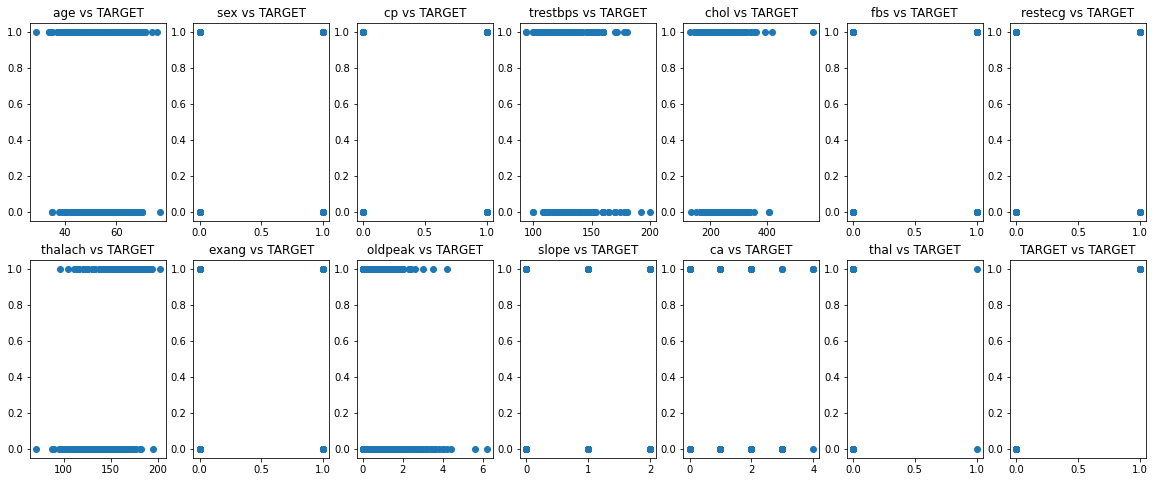

In [13]:
plt.figure(figsize=(20,8))

for i in range(14):
    plt.subplot(2, 7, i+1)
    plt.scatter(table.iloc[:, i], table["TARGET"])
    plt.title(f"{table.columns[i]} vs TARGET")
    
plt.show()
# As we have a binary problem, vs TARGET graphs does not interest us very much.
# Additionally we cannot see the density, which could have been described by colors

In [14]:
import seaborn as sns

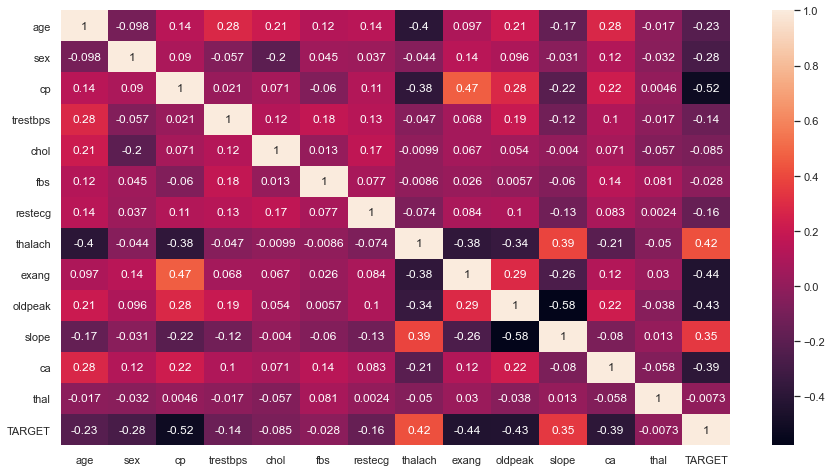

In [15]:
pat_data = pd.DataFrame(x, columns = feature_names)
pat_data["TARGET"] = y

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=pat_data.corr(), annot=True)

# multicollinearity among the predictors:
# weak negative linear correlation between age-thalach
# weak negative linear correlation between cp-exang
# weak negative linear correlation between thalach-exang, thalach-oldpeak
# weak negative linear correlation between exang-TARGET 
# medium negative linear correlation between oldpeak-slope, oldpeak-TARGET 
# etc.
# I will exclude thalach as it has many correlation with other parameters.
# I will exclude oldpeak and cp for the same reason. 
# I excluded parameters which has two negative, one positive relation to target.

x = {i:x[i] for i in x if i!="thalach"}
x = {i:x[i] for i in x if i!="oldpeak"}
x = {i:x[i] for i in x if i!="cp"}

In [16]:
print(x.values())

dict_values([0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64, 0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64, 0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64, 0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64, 0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64, 0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    1.0
Name: restecg, Length: 303, dtype: float64, 0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300 

### Step 3
Split data into train and test.

In [17]:
X_list = [*x.values()]
arr = np.array(X_list)
X = arr.transpose()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 10) (61, 10) (242,) (61,)


In [18]:
print(X_list)

[0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64, 0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64, 0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64, 0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64, 0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64, 0      1.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    1.0
Name: restecg, Length: 303, dtype: float64, 0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    

### Step 4
Standardize x data with respect to x_train.

In [19]:

scaler2 = preprocessing.StandardScaler()
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)
X = scaler2.transform(X)

# We defined a regressor and then fitted our sample data. We could use two seperate lines: one for initializiation and
# for fitting. However, this approach is also correct.
regressor = linear_model.LogisticRegression().fit(X_train,y_train)



### Step 5
Apply logistic regression.

In [20]:
print('Test Accuracy: ', regressor.score(X_test,y_test))

Test Accuracy:  0.819672131147541


### Step 6
Evaluate the accuracy of the model and make comment.

In [21]:
# confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = regressor.predict(X_test)
confusion_matrix(y_test, y_pred)

# 50/61 = 0.81967

array([[21,  6],
       [ 5, 29]], dtype=int64)

## Feedback
What do you think your $\frac{Challenge}{Skill Level}$ ratio is? (<1 easy/boring, >1 hard/overwhelming, ~1 balanced)
11/10
<br>

If there are any part which is not clear to you, you can write down your questions here.